In [42]:
import sys
sys.path
sys.path.append('..')
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, models, transforms
from torchvision.models.resnet import BasicBlock
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from model import Net
import itertools
from data import data_transforms, data_transfom_identity
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")


# Exploring dataset

### 1) Plotting random images from validation and training set

In [13]:
train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder('../bird_dataset/train_images',
                         transform=data_transfom_identity),
    batch_size=10000, shuffle=True, num_workers=1)

In [14]:
evaluation_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder('../bird_dataset/val_images',
                         transform=data_transfom_identity),
    batch_size=10000, shuffle=True, num_workers=1)

In [15]:
for data, target in train_loader:
    print('load')
    

load


In [16]:
for data_val, target_val in evaluation_loader:
    print('load')
    

load


#### Training images

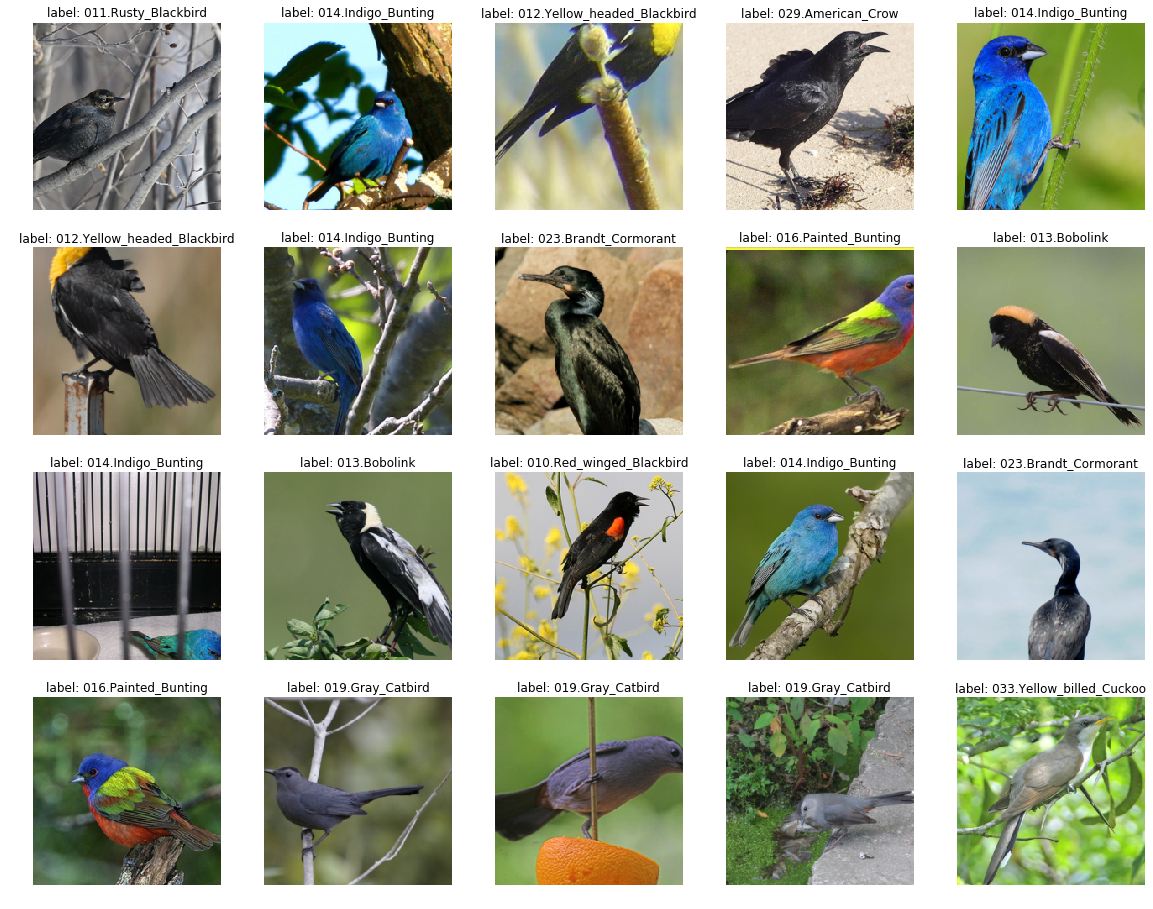

In [27]:
plt.figure(figsize=(20,20))
c = 0
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(np.transpose(data[i], (1, 2, 0)), interpolation='nearest')
    plt.axis('off')
    plt.title('label: {}'.format(train_loader.dataset.classes[target[i]]))

#### Validation images

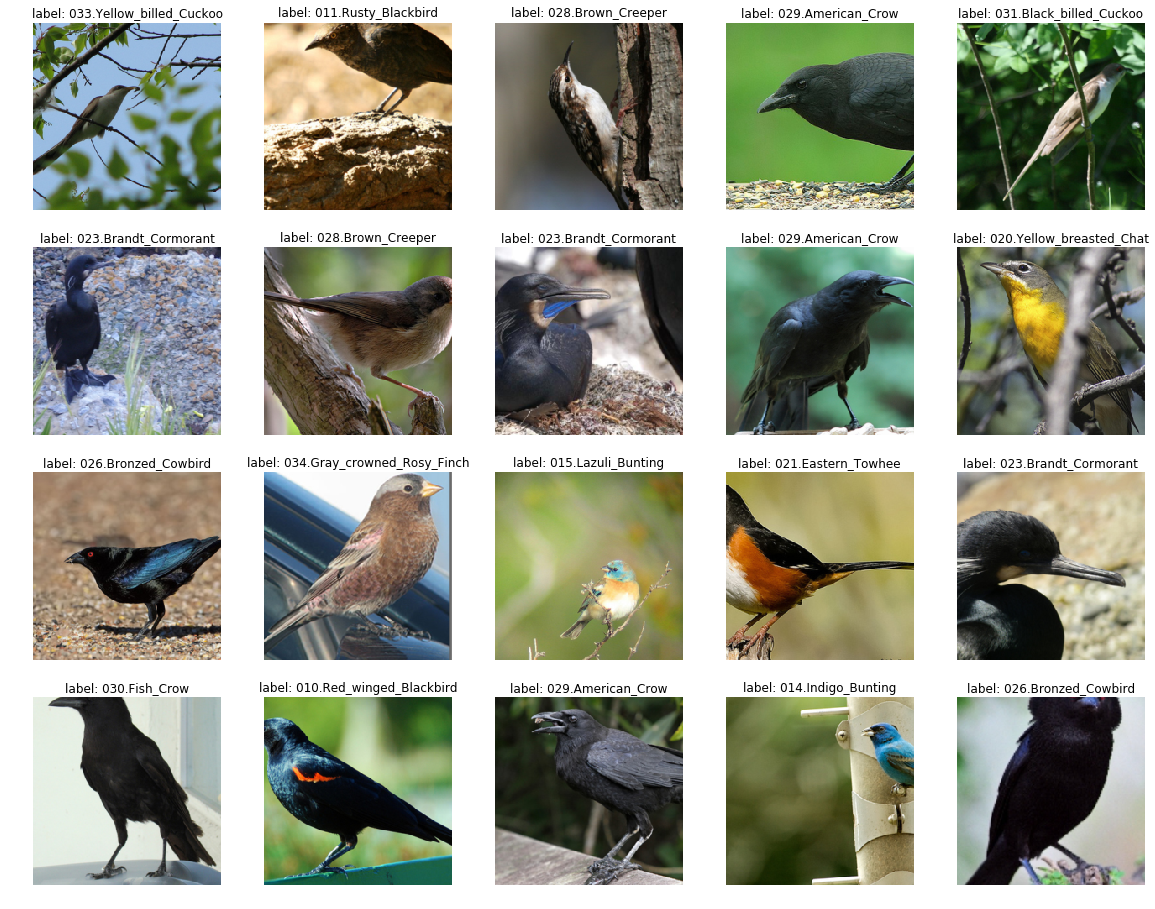

In [28]:
plt.figure(figsize=(20,20))
c = 0
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(np.transpose(data_val[i], (1, 2, 0)), interpolation='nearest')
    plt.axis('off')
    plt.title('label: {}'.format(evaluation_loader.dataset.classes[target_val[i]]))


### 2) Computing mean and std on training dataset

#### Mean and Std on RGB channels

In [19]:
r_mean = data[:,0,:,:].mean().numpy()
g_mean = data[:,1,:,:].mean().numpy()
b_mean = data[:,2,:,:].mean().numpy()

In [20]:
print(r_mean, g_mean, b_mean)

0.48236355 0.5011499 0.42459548


In [21]:
r_std = data[:,0,:,:].std().numpy()
g_std = data[:,1,:,:].std().numpy()
b_std = data[:,2,:,:].std().numpy()

In [22]:
print(r_mean, g_mean, b_mean)

0.48236355 0.5011499 0.42459548


In [35]:
data.size()

torch.Size([1082, 3, 224, 224])

### 3) Exploring classes balance

#### Training

In [30]:
df = pd.DataFrame([train_loader.dataset.classes[tar] for tar in target] )
df.columns = ['classes']

In [31]:
df.groupby('classes').size()

classes
004.Groove_billed_Ani          58
009.Brewer_Blackbird           55
010.Red_winged_Blackbird       53
011.Rusty_Blackbird            57
012.Yellow_headed_Blackbird    54
013.Bobolink                   58
014.Indigo_Bunting             57
015.Lazuli_Bunting             54
016.Painted_Bunting            52
019.Gray_Catbird               54
020.Yellow_breasted_Chat       51
021.Eastern_Towhee             54
023.Brandt_Cormorant           53
026.Bronzed_Cowbird            52
028.Brown_Creeper              52
029.American_Crow              53
030.Fish_Crow                  54
031.Black_billed_Cuckoo        55
033.Yellow_billed_Cuckoo       55
034.Gray_crowned_Rosy_Finch    51
dtype: int64

---------------------------------

Data set seems to be well balanced

---------------------------------

 #### Validation

In [32]:
df = pd.DataFrame([train_loader.dataset.classes[tar] for tar in target_val] )
df.columns = ['classes']

In [34]:
df.groupby('classes').size()

classes
004.Groove_billed_Ani          2
009.Brewer_Blackbird           4
010.Red_winged_Blackbird       7
011.Rusty_Blackbird            3
012.Yellow_headed_Blackbird    2
013.Bobolink                   2
014.Indigo_Bunting             3
015.Lazuli_Bunting             4
016.Painted_Bunting            6
019.Gray_Catbird               5
020.Yellow_breasted_Chat       8
021.Eastern_Towhee             6
023.Brandt_Cormorant           6
026.Bronzed_Cowbird            8
028.Brown_Creeper              7
029.American_Crow              7
030.Fish_Crow                  6
031.Black_billed_Cuckoo        5
033.Yellow_billed_Cuckoo       4
034.Gray_crowned_Rosy_Finch    8
dtype: int64

---------------------------------

There is more variance in the validation set

---------------------------------

### 2) Data Augmentation

In [39]:
train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder('../bird_dataset/train_images',
                         transform=data_transforms['train']),
    batch_size=10000, shuffle=True, num_workers=1)

In [40]:
for data, target in train_loader:
    print('load')
    

load


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

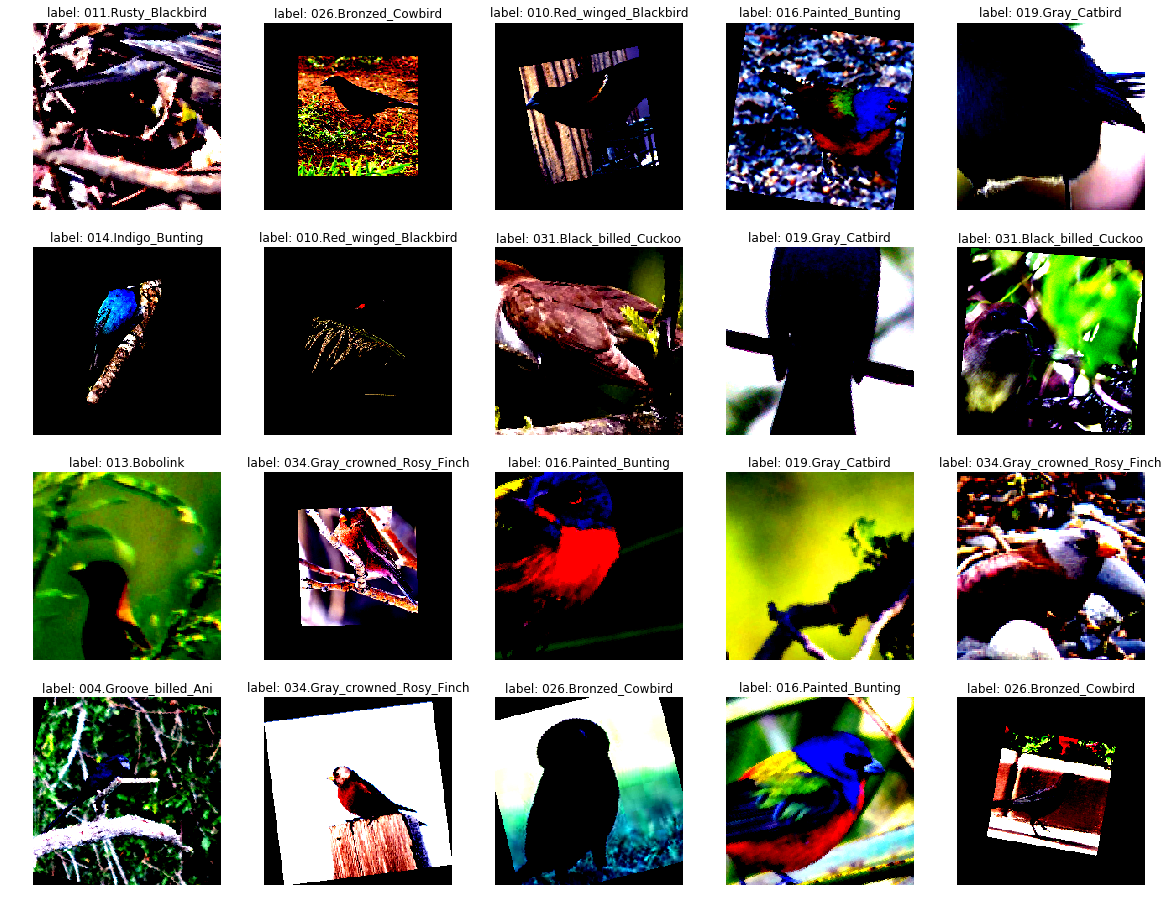

In [43]:
plt.figure(figsize=(20,20))
c = 0
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(np.transpose(data[i], (1, 2, 0)), interpolation='nearest')
    plt.axis('off')
    plt.title('label: {}'.format(train_loader.dataset.classes[target[i]]))